In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
from chunk_utils import kdata2delaysOLD
import numpy as np
data_dir = './/data//names'
image_dir = './/images'

In [2]:
# basic init
filenames = list(filter(lambda x: x.endswith('.kdt'), os.listdir(data_dir)))
matplotlib.rcParams['figure.figsize'] = 13,9

In [3]:
# main program
fn = filenames[-4]
with open(data_dir+'//'+fn, 'r') as fh:
    filedata = fh.read()
typedname, rawkd = filedata.split('\n')
n_chars = len(typedname)

delays = np.array(kdata2delaysOLD(typedname, rawkd))
keypairs = list(map(lambda x: x[0]+x[1], zip(typedname, typedname[1:])))

In [9]:
delays.shape, keypairs

((20, 13),
 ['AB',
  'BH',
  'HI',
  'IS',
  'SH',
  'HE',
  'EK',
  'K ',
  ' S',
  'SA',
  'AH',
  'HA',
  'AI'])

In [11]:
del1 = np.mean(delays[:10], axis=0)
del2 = np.mean(delays[-10:], axis=0)
del1.shape, del2.shape

((13,), (13,))

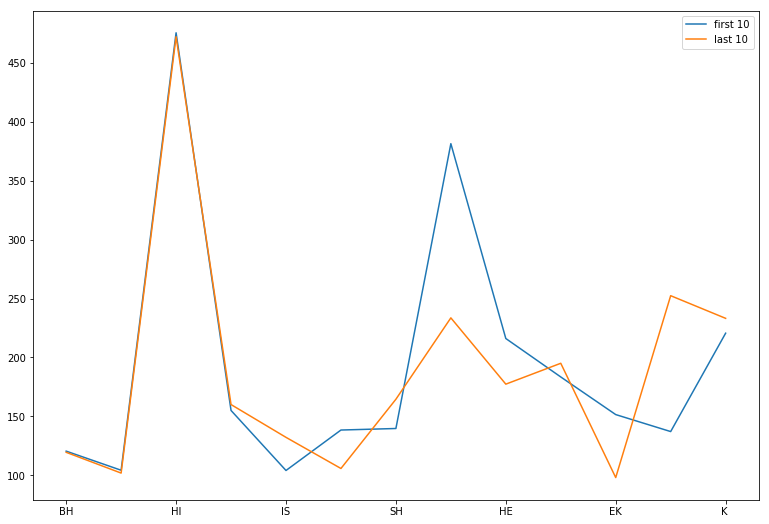

In [20]:
fig, ax = plt.subplots()
ticks = ax.get_xticks()
ax.set_xticks(range(len(del1)))
ax.set_xticklabels(keypairs)

ax.plot(del1, label="first 10")
ax.plot(del2, label="last 10")
plt.legend()
plt.show()

(13, 13)